# Kaggle 연동

In [142]:
!pip install kaggle

In [143]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"ahjinkim","key":"4516ad969745cd1a304c7a2f58d74e57"}'}

In [144]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Apr 13 04:12 kaggle.json


In [145]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [146]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Apr 13 04:12 kaggle.json


In [147]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [148]:
!ls

 gender_submission.csv	'kaggle (2).json'   sample_data   train.csv
'kaggle (1).json'	 kaggle.json	    test.csv


# 데이터 확인하기

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2)

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

%matplotlib inline

In [150]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [151]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [153]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [154]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Null data 확인하기 

### 퍼센트로 출력하기

In [155]:
for col in df_train.columns:
    msg = "column: {: >10}\t Percentage of Nan values: {:.2f}%".format(col, 100*df_train[col].isnull().sum()/df_train[col].shape[0])
    print(msg)

column: PassengerId	 Percentage of Nan values: 0.00%
column:   Survived	 Percentage of Nan values: 0.00%
column:     Pclass	 Percentage of Nan values: 0.00%
column:       Name	 Percentage of Nan values: 0.00%
column:        Sex	 Percentage of Nan values: 0.00%
column:        Age	 Percentage of Nan values: 19.87%
column:      SibSp	 Percentage of Nan values: 0.00%
column:      Parch	 Percentage of Nan values: 0.00%
column:     Ticket	 Percentage of Nan values: 0.00%
column:       Fare	 Percentage of Nan values: 0.00%
column:      Cabin	 Percentage of Nan values: 77.10%
column:   Embarked	 Percentage of Nan values: 0.22%


In [156]:
for col in df_test.columns:
    msg = "column: {: >10}\t Percentage of Nan values: {:.2f}%".format(col, 100*df_test[col].isnull().sum()/df_test[col].shape[0])
    print(msg)

column: PassengerId	 Percentage of Nan values: 0.00%
column:     Pclass	 Percentage of Nan values: 0.00%
column:       Name	 Percentage of Nan values: 0.00%
column:        Sex	 Percentage of Nan values: 0.00%
column:        Age	 Percentage of Nan values: 20.57%
column:      SibSp	 Percentage of Nan values: 0.00%
column:      Parch	 Percentage of Nan values: 0.00%
column:     Ticket	 Percentage of Nan values: 0.00%
column:       Fare	 Percentage of Nan values: 0.24%
column:      Cabin	 Percentage of Nan values: 78.23%
column:   Embarked	 Percentage of Nan values: 0.00%


### msno 라이브러리 이용하기

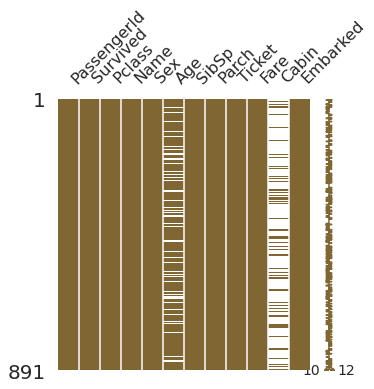

In [157]:
msno.matrix(df=df_train, figsize=(5, 5), color=(0.5, 0.4, 0.2))

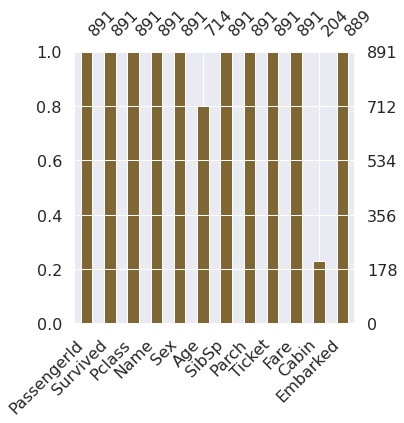

In [158]:
msno.bar(df=df_train, figsize=(5, 5), color=(0.5, 0.4, 0.2))

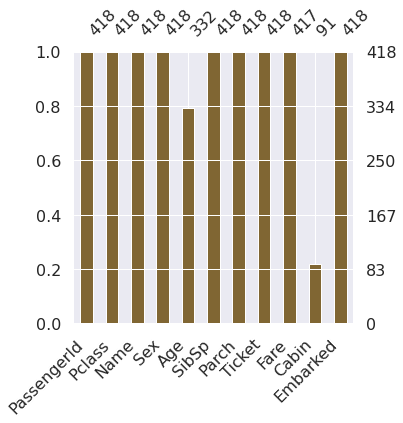

In [159]:
msno.bar(df=df_test, figsize=(5, 5), color=(0.5, 0.4, 0.2))

## target label 분포 확인하기

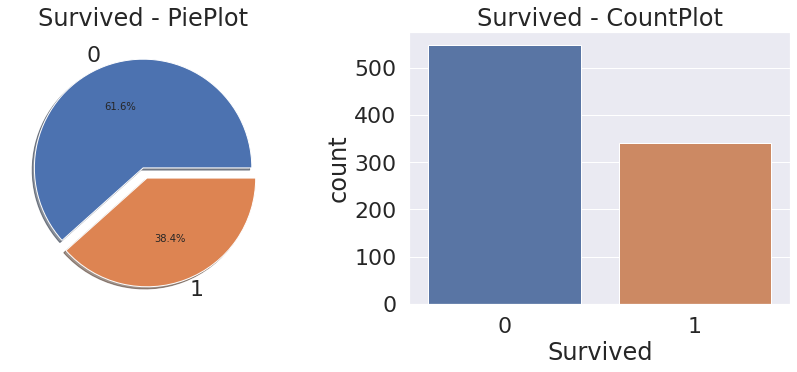

In [160]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                             autopct='%1.1f%%',
                                             ax=ax[0],
                                             shadow=True)
ax[0].set_title('Survived - PiePlot')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived - CountPlot')

plt.show()

# EDA

### pclass

In [161]:
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

In [162]:
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

In [163]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')
# background cmap: google) color example code 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


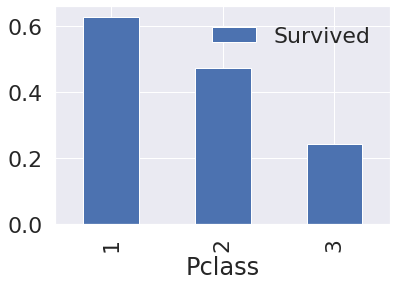

In [164]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() 

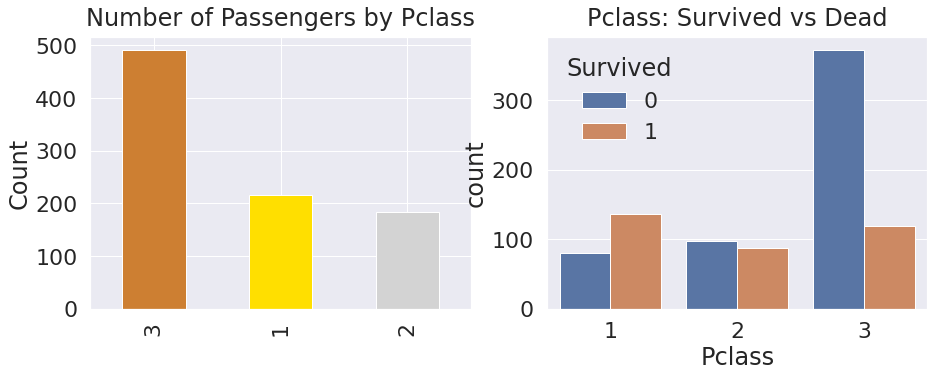

In [165]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(15, 5))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],
                                           ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

=> **Pclass가 좋을수록 생존률이 높다**

## sex

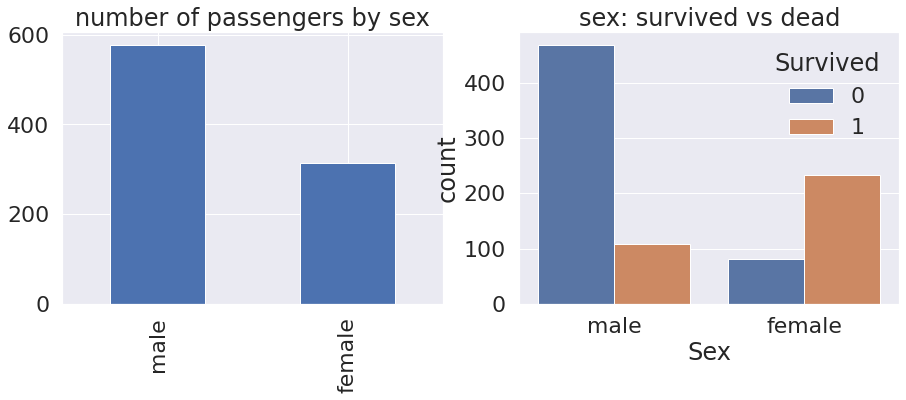

In [166]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

df_train['Sex'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("number of passengers by sex")

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("sex: survived vs dead")

plt.show()

In [167]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient('cool')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


=> **Female이 생존률이 높다**

## sex + pclass

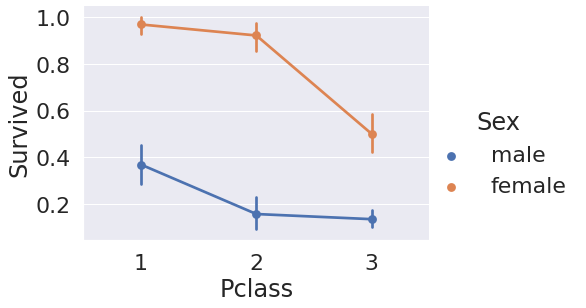

In [168]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=4, aspect=1.5)

In [169]:
# 그래프 비교: hue vs col
# sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train)

## age

In [170]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [171]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

feature 'Age': 
1. numeric 
2. null값 존재
3. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 
4. 최고령 80세, 최연소 0.4세, 평균 29.6세 

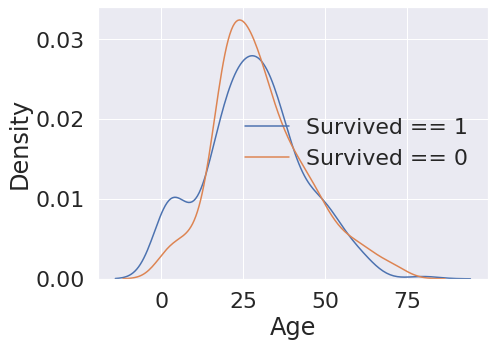

In [172]:
# age 분포 확인 
plt.figure(figsize=(7, 5))

sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'])

plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

In [173]:
# # class별 age 분포 확인 
# plt.figure(figsize=(7, 5))

# df_train['Age'][df_train['Pclass']==1].plot(kind="kde")
# df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
# df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

# plt.xlabel('age')
# plt.ylabel("")
# plt.title("age distribution by Pclass")
# plt.legend(['1st', '2nd', '3rd'])

# plt.show()

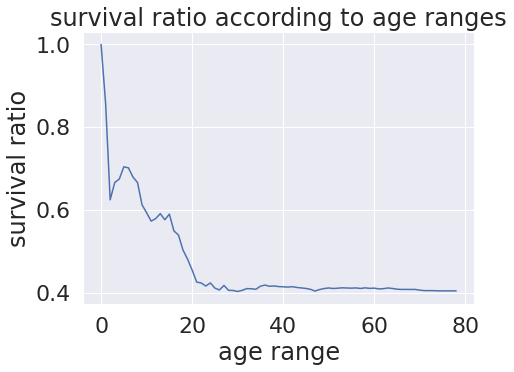

In [174]:
# 나이가 어릴수록 생존률이 높은 것이 맞는지 나이범위별로 생존률 변화를 알아본다. 
survival_ratio_according_to_age_ranges = []
for i in range(1, 80): 
    survival_ratio_according_to_age_ranges.append(df_train[df_train['Age'] < i]['Survived'].sum()/len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 5))
plt.plot(survival_ratio_according_to_age_ranges)
plt.title("survival ratio according to age ranges")
plt.ylabel('survival ratio')
plt.xlabel('age range')
plt.show()

=> **나이가 어릴수록 생존률이 높다**

## age + pclass / sex

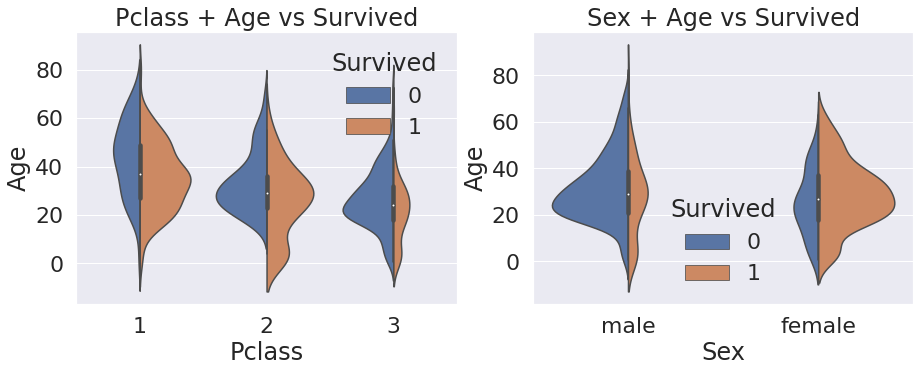

In [175]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, 
               scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass + Age vs Survived')
ax[0].set_yticks(range(0, 100, 20))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train,
               scale="count", split=True, ax=ax[1])
ax[1].set_title("Sex + Age vs Survived")
ax[1].set_yticks(range(0, 100, 20))

plt.show()

## embarked

<Figure size 360x360 with 0 Axes>

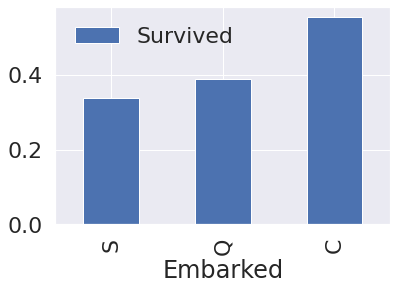

In [176]:
plt.figure(figsize=(5, 5))
df_train[['Embarked', 'Survived']].groupby("Embarked", as_index=True).mean().sort_values(by="Survived", ascending=True).plot.bar()

=> C에서 탑승한 승객들의 생존률이 높다. 

## embarked + pclass / sex

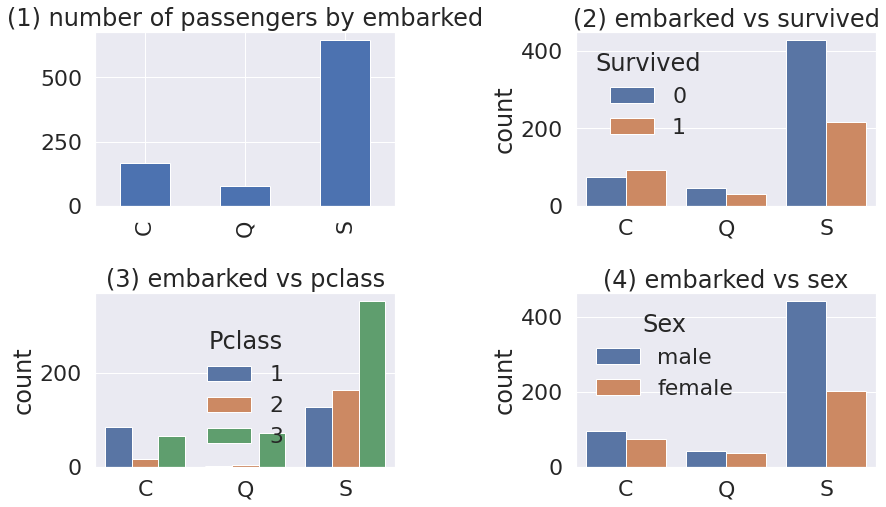

In [177]:
f, ax = plt.subplots(2, 2, figsize=(14, 8))

df_train['Embarked'].value_counts().sort_index().plot.bar(ax=ax[0, 0])
ax[0, 0].set_title("(1) number of passengers by embarked")

sns.countplot("Embarked", hue='Survived', data=df_train, ax=ax[0,1], order=df_train['Embarked'].value_counts().sort_index().index)
ax[0, 1].set_title("(2) embarked vs survived")
ax[0, 1].set_xlabel("")

sns.countplot("Embarked", hue="Pclass", data=df_train, ax=ax[1,0], order=df_train['Embarked'].value_counts().sort_index().index)
ax[1, 0].set_title("(3) embarked vs pclass")
ax[1, 0].set_xlabel("")

sns.countplot("Embarked", hue="Sex", data=df_train, ax=ax[1,1], order=df_train['Embarked'].value_counts().sort_index().index)
ax[1, 1].set_title("(4) embarked vs sex")
ax[1, 1].set_xlabel("")

plt.subplots_adjust(wspace=0.6, hspace=0.5)

plt.show()

=> C에서 탑승한 승객의 생존률이 높은 이유: Pclass가 높다, 여성의 비율이 높다. 

## family size

In [178]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [179]:
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [180]:
print("Maximum size of the Family: ", df_train['FamilySize'].max())
print("Minimum size of the Family: ", df_train['FamilySize'].min())

Maximum size of the Family:  11
Minimum size of the Family:  1


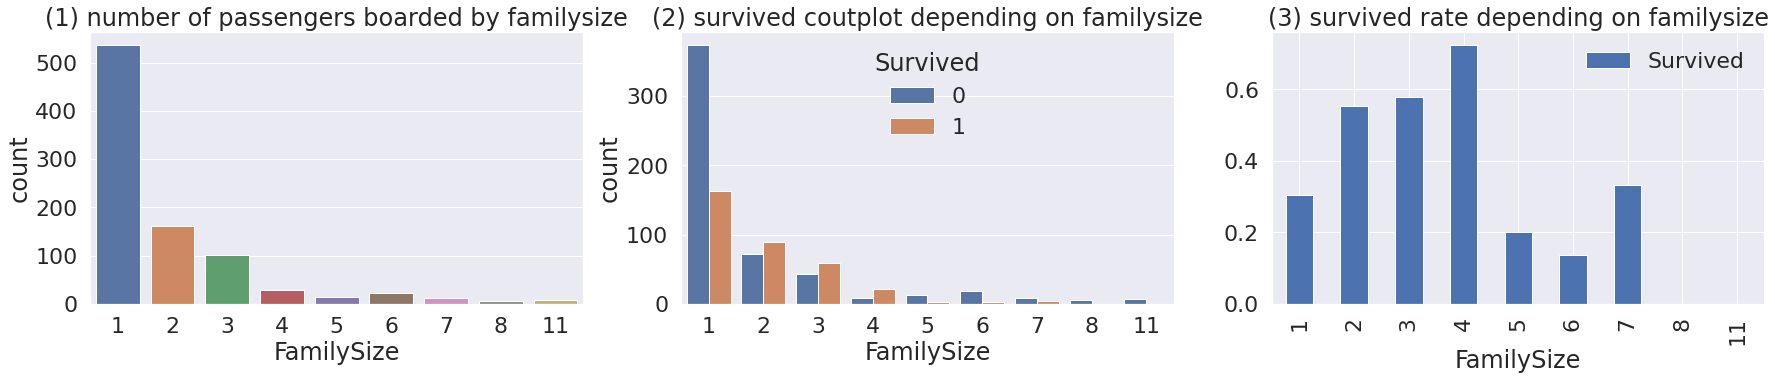

In [181]:
f, ax = plt.subplots(1, 3, figsize=(30, 5))

sns.countplot("FamilySize", data=df_train, ax=ax[0])
ax[0].set_title("(1) number of passengers boarded by familysize")

sns.countplot("FamilySize", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("(2) survived coutplot depending on familysize")

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_index().plot.bar(ax=ax[2])
ax[2].set_title("(3) survived rate depending on familysize")

plt.subplots_adjust(wspace=0.2)

plt.show()

=> 2~4명이 탔을 때 생존률이 높다. 

## fare

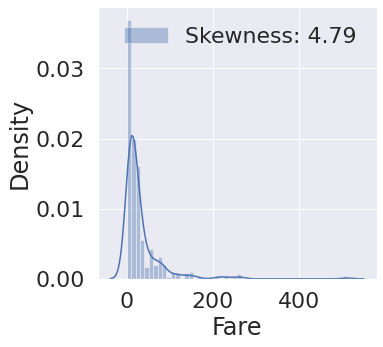

In [182]:
plt.figure(figsize=(5, 5))

g = sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()))
g = g.legend(loc='best')

plt.show()

In [183]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [184]:
df_test['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [185]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

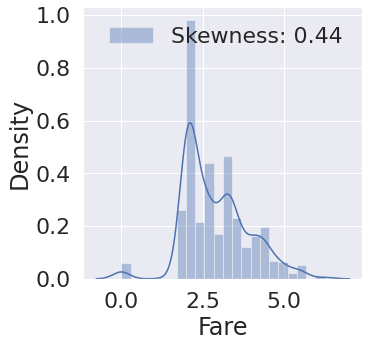

In [186]:
plt.figure(figsize=(5, 5))

g = sns.distplot(df_train['Fare'], label='Skewness: {:.2f}'.format(df_train['Fare'].skew()))
g = g.legend(loc='best')

plt.show()

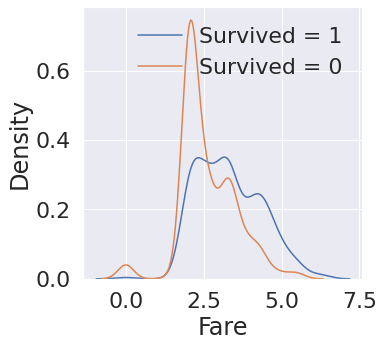

In [187]:
plt.figure(figsize=(5, 5))

sns.kdeplot(df_train[df_train['Survived']==1]['Fare']) 
sns.kdeplot(df_train[df_train['Survived']==0]['Fare']) 

plt.legend(['Survived = 1', 'Survived = 0'], loc='upperright')
plt.show()

=> fare가 생존률에 미치는 영향은 그리 크지 않게 보인다. 

# feature engineering

## null data 채우기

### age: name feature 이용한 평균값

In [192]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [195]:
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [198]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient("cool")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [199]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [200]:
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [204]:
df_train[['Initial', 'Age']].groupby("Initial").mean().T

Initial,Master,Miss,Mr,Mrs,Other
Age,4.574167,21.86,32.739609,35.981818,45.888889


In [206]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'), 'Age'] = 46

In [207]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Other'), 'Age'] = 46

### embarked: 